In [1]:
# load coverage histogram files 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re
import ast
import HTSeq
from Bio import SeqIO

font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2) 
sns.set(font_scale = 2)

# dereks function for optimal leaf clustering
def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='average')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order

from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from polo import optimal_leaf_ordering

In [101]:
o2_000 = pd.read_table('reassembly/coverage_info/Obsidian2_Reassembly/shotgunReads_realignmentDepthProfile.000.txt')
for c in o2_000['ContigName'].unique():

    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(10)
    gs = gridspec.GridSpec(1,6)

    ax1 = f.add_subplot(gs[0,0:-1])
    o2_000[o2_000['ContigName'] == c].plot.scatter(x='Position',y='Obsidian2Bulk',ax=ax1)
    plt.yscale('log')
    plt.ylim(.1,3e2)
    plt.title('Coverage profile')

    ax2 = f.add_subplot(gs[0,-1])
    b = plt.hist(o2_000[o2_000['ContigName'] == c]['Obsidian2Bulk'],bins=np.logspace(-1,3,40))
    plt.step(b[0],b[1][0:-1],linewidth=4)
    plt.ylim(.1,3e2)
    plt.yscale('log');plt.yticks([])
    #plt.xlim(.1,1e5)
    #plt.xscale('log')
    f.savefig('reassembly/coverage_info/Obsidian2_Reassembly/bin_000_contig'+c[5:7])#plt.show()
    f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


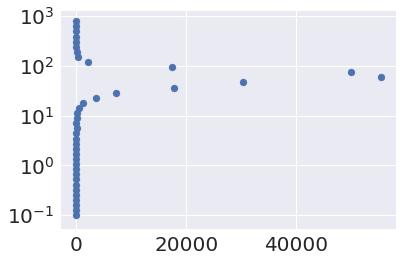

In [63]:
plt.scatter(b[0],b[1][0:-1])
plt.yscale('log')
plt.show()

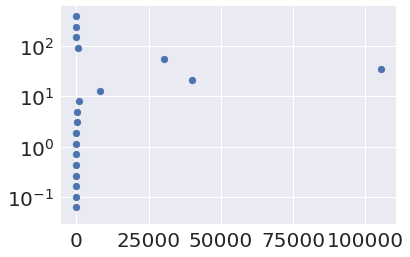

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.50000000e+01,   4.40000000e+01,
          1.43000000e+02,   9.95000000e+02,   8.08600000e+03,
          3.99930000e+04,   1.05424000e+05,   3.02670000e+04,
          5.88000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([  1.00000000e-01,   1.62377674e-01,   2.63665090e-01,
          4.28133240e-01,   6.95192796e-01,   1.12883789e+00,
          1.83298071e+00,   2.97635144e+00,   4.83293024e+00,
          7.84759970e+00,   1.27427499e+01,   2.06913808e+01,
          3.35981829e+01,   5.45559478e+01,   8.85866790e+01,
          1.43844989e+02,   2.33572147e+02,   3.79269019e+02,
          6.15848211e+02,   1.00000000e+03]),
 <a list of 19 Patch objects>)

In [53]:

plt.scatter(b[0],np.diff(b[1]))
#plt.xscale('log');
plt.yscale('log')
plt.show()
b

In [75]:
o2_000['ContigName'].unique()

array(['NODE_1_length_32989_cov_3.90255',
       'NODE_2_length_24421_cov_11.4552',
       'NODE_3_length_18527_cov_1.81475', 'NODE_4_length_17274_cov_24.061',
       'NODE_5_length_14802_cov_3.0876', 'NODE_6_length_12908_cov_10.6153',
       'NODE_7_length_12405_cov_3.32155',
       'NODE_8_length_12305_cov_17.1691',
       'NODE_9_length_12122_cov_6.26366',
       'NODE_10_length_11631_cov_15.4058',
       'NODE_11_length_11628_cov_14.9395',
       'NODE_12_length_11537_cov_1.44947',
       'NODE_13_length_10889_cov_22.6496',
       'NODE_14_length_10719_cov_6.67269',
       'NODE_15_length_10523_cov_7.42249',
       'NODE_16_length_10204_cov_30.3632',
       'NODE_17_length_10169_cov_1.10973',
       'NODE_18_length_10150_cov_15.449',
       'NODE_19_length_9985_cov_4.30285',
       'NODE_20_length_9408_cov_1.04834',
       'NODE_21_length_9140_cov_0.341998',
       'NODE_22_length_8683_cov_15.6461',
       'NODE_23_length_8626_cov_3.52949',
       'NODE_24_length_8533_cov_1.77259',

In [79]:
o2_000 = pd.read_table('reassembly/coverage_info/Obsidian3_Reassembly/shotgunReads_realignmentDepthProfile.096.txt')

# log scale contigs minimeta bin 096
"""for c in o2_000['ContigName'].unique():
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(10)
    gs = gridspec.GridSpec(1,6)

    ax1 = f.add_subplot(gs[0,0:-2])
    o2_000[o2_000['ContigName'] == c].plot.scatter(x='Position',y='Obsidian3Bulk',ax=ax1)
    plt.yscale('log')
    plt.ylim(.1,3e2)
    plt.title('Coverage profile bin 096'+ c[5:7])

    ax2 = f.add_subplot(gs[0,-2:])
    b = plt.hist(o2_000[o2_000['ContigName'] == c]['Obsidian3Bulk'],bins=np.logspace(-1,3,40))
    plt.step(b[0],b[1][0:-1],linewidth=4)
    plt.ylim(.1,3e2)
    plt.yscale('log');plt.yticks([])
    f.savefig('reassembly/coverage_info/Obsidian3_Reassembly/bin_096_contig'+c[5:7])
    f.clf()"""

# lin
for c in o2_000['ContigName'].unique():
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(10)
    gs = gridspec.GridSpec(1,6)

    ax1 = f.add_subplot(gs[0,0:-2])
    o2_000[o2_000['ContigName'] == c].plot.scatter(x='Position',y='Obsidian3Bulk',ax=ax1)
    #plt.yscale('log')
    plt.ylim(-10,1e2)
    plt.title('Coverage profile bin 096, contig '+ c[5:7])

    ax2 = f.add_subplot(gs[0,-2:])
    b = plt.hist(o2_000[o2_000['ContigName'] == c]['Obsidian3Bulk'],bins=np.linspace(0,200,60))
    plt.step(b[0],b[1][0:-1],linewidth=4)
    plt.ylim(-10,1e2)
    #plt.yscale('log')
    plt.yticks([])
    f.savefig('reassembly/coverage_info/Obsidian3_Reassembly/lin_bin_096_contig'+c[5:7])
    f.clf()


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [13]:
o2_000[o2_000['ContigName'] == o2_000['ContigName'].unique()[0]]

,ContigName,Position,Obsidian3Bulk
0,NODE_1_length_32989_cov_3.90255,1,0
1,NODE_1_length_32989_cov_3.90255,2,0
2,NODE_1_length_32989_cov_3.90255,3,0
3,NODE_1_length_32989_cov_3.90255,4,0
4,NODE_1_length_32989_cov_3.90255,5,0
5,NODE_1_length_32989_cov_3.90255,6,0
6,NODE_1_length_32989_cov_3.90255,7,0
7,NODE_1_length_32989_cov_3.90255,8,0
8,NODE_1_length_32989_cov_3.90255,9,2
9,NODE_1_length_32989_cov_3.90255,10,2


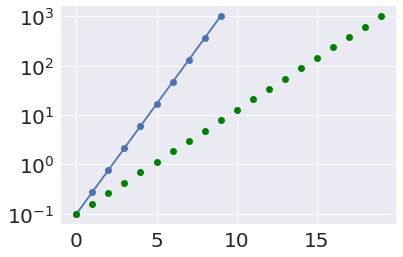

In [47]:
a = np.logspace(-1,3,10)
c = np.logspace(-1,3,20)
c_c = [s for s in c]
plt.plot(a,'-o')
plt.plot(c,'og')
plt.yscale('log')
plt.show()

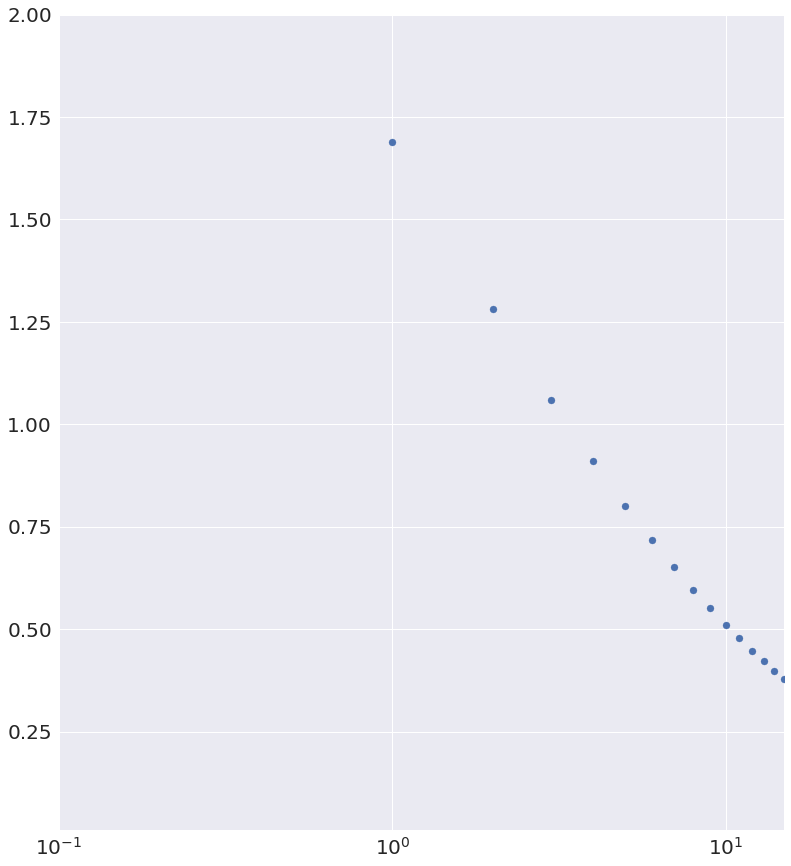

In [100]:
"""x = np.linspace(0,500,501)
b= 3
m = 1.45
c = .05
a = x**(1/b)-m
y=(1/b)**(a)+c"""

f = plt.figure()
f.set_figwidth(13)
f.set_figheight(15)
plt.scatter(x,y)
#plt.yscale('log');
plt.xscale('log')
plt.ylim(1e-2,2);plt.xlim(0.1,15)
plt.show()

9